In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
cd /content/drive/MyDrive/dcx_mid_project/DCX_Mid_Project

/content/drive/MyDrive/dcx_mid_project/DCX_Mid_Project


In [4]:
# cd /content/drive/MyDrive/Project_Folder

### tesseract 설치

In [5]:
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 24 not upgraded.
Need to get 4,850 kB of archives.
After this operation, 16.3 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1 [1,598 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr amd64 4.1.1-2build2 [262 kB]
Fetched 4,850 kB in 2s (2,038 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/Fro

In [6]:
!pip install pytesseract

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
%pwd

'/content/drive/MyDrive/dcx_mid_project/DCX_Mid_Project'

### img read

In [8]:
import pytesseract
import cv2
import os
from PIL import Image
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np
import requests
from imutils.perspective import four_point_transform
import imutils

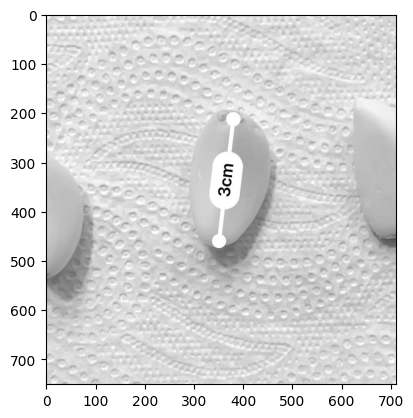

In [9]:
#imread
image_org = cv2.imread('length/3cm/garlic_3cm_1.jpg')
gray = cv2.cvtColor(image_org, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

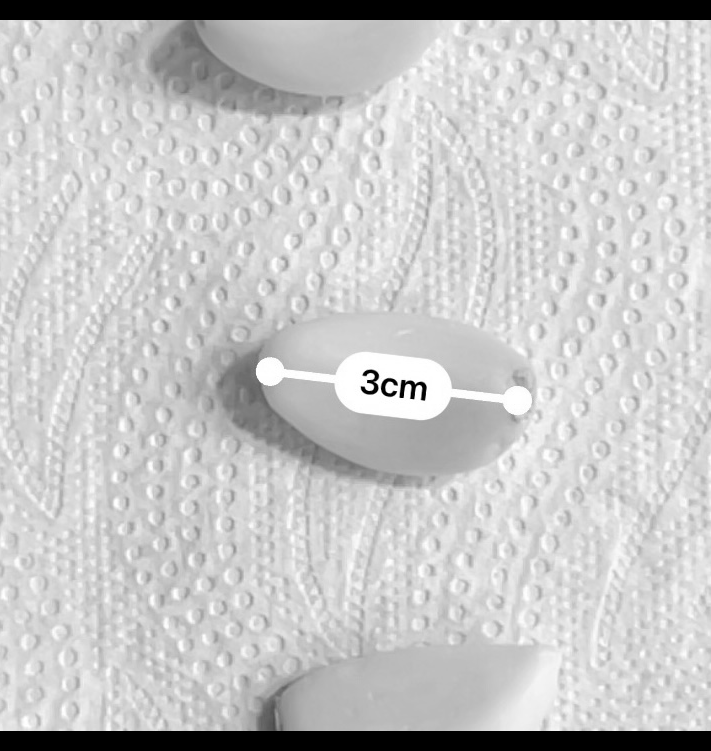

3cm
A



In [10]:
#image rotation
(h,w) = gray.shape[:2]
center = (w//2, h//2)

M = cv2.getRotationMatrix2D(center, -90, 1.0)
rotated = cv2.warpAffine(gray, M, (w,h))
cv2_imshow(rotated)

options = "--psm 4"
text = pytesseract.image_to_string(rotated, config=options)

print(text)

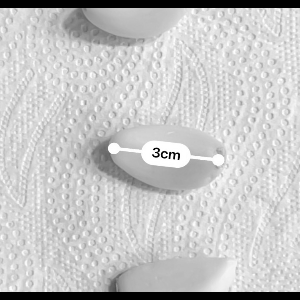

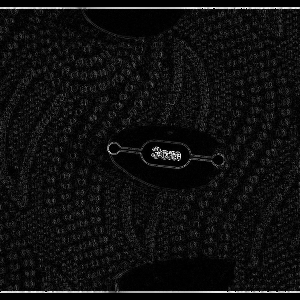

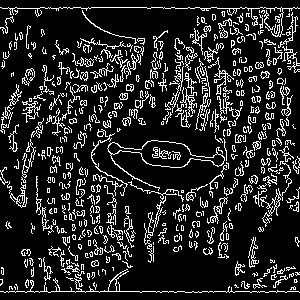

In [11]:
image = rotated.copy()

image = cv2.resize(image,(300,300))

#Gaussian blurred
gaus_ing = cv2.GaussianBlur(image, (5,5),0.3)
cv2_imshow(gaus_ing)

lap = cv2.Laplacian(gaus_ing, cv2.CV_64F)
lap = np.uint8(np.absolute(lap))
cv2_imshow(lap)

#edged
edged = cv2.Canny(gaus_ing, 75, 200)
cv2_imshow(edged)

tesseract_2
https://yunwoong.tistory.com/72?category=902345

이미지 배경 제거

In [12]:
# 이미지 배경 제거

In [13]:
!pip install rembg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 45.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.7/47.7 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 96.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 69.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 40.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 84.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 kB 37.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━

In [14]:
from rembg import remove

100%|███████████████████████████████████████| 176M/176M [00:00<00:00, 13.4GB/s]


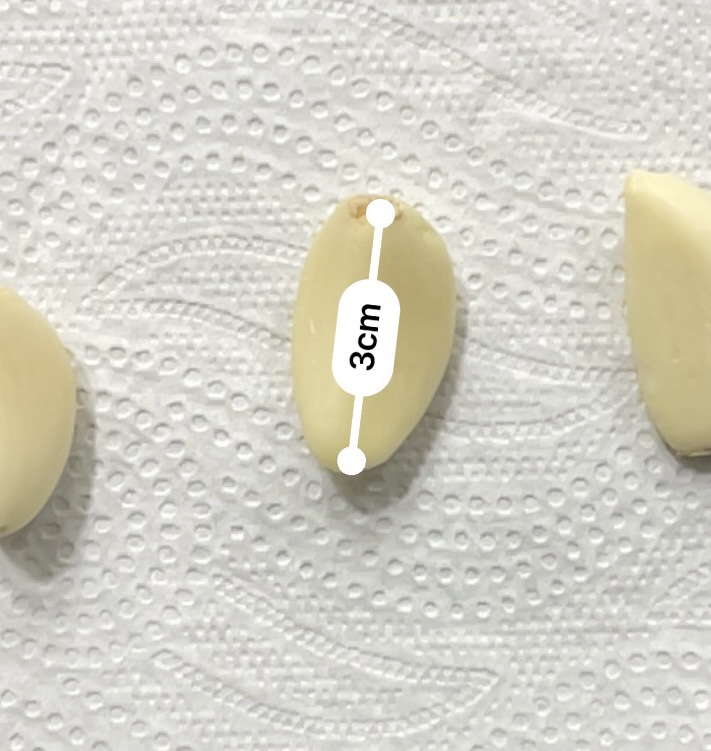

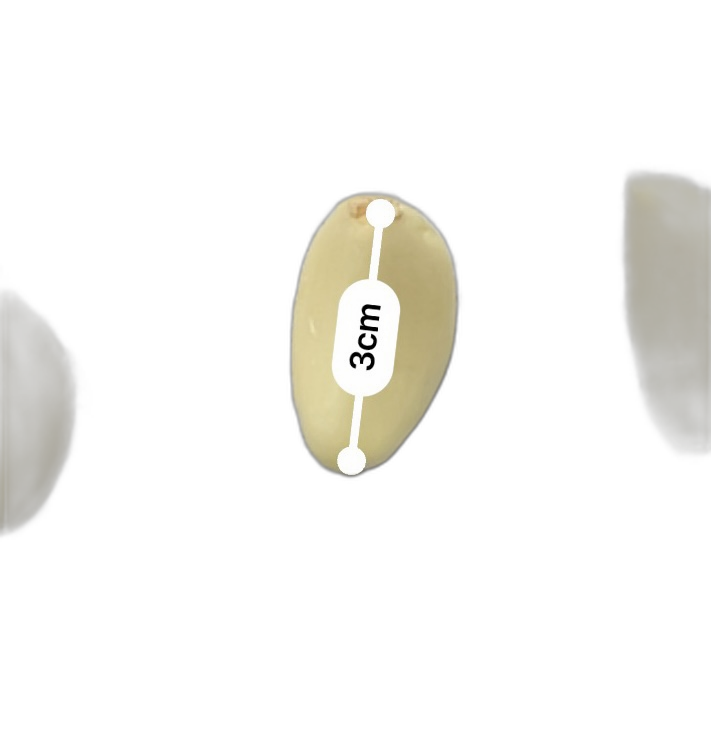

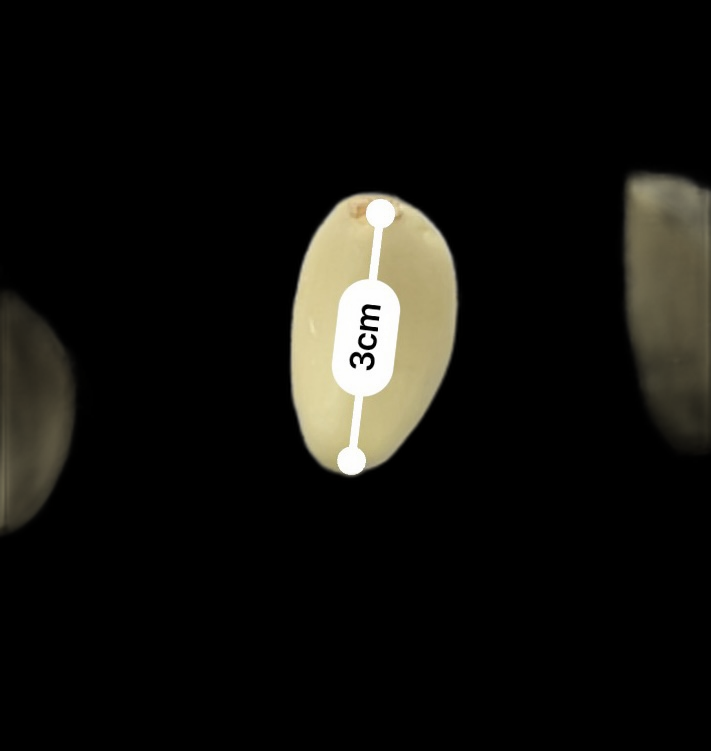

(751, 711, 3) (751, 711, 4) (751, 711, 3)


In [15]:
out = remove(image_org)
cv2_imshow(image_org)
cv2_imshow(out)
rgb_image = out[:,:,:3]
cv2_imshow(rgb_image)

print(image_org.shape, out.shape, rgb_image.shape)

[[[255 255 255   0]
  [255 255 255   0]
  [255 255 255   0]
  ...
  [255 255 255   0]
  [255 255 255   0]
  [255 255 255   0]]

 [[255 255 255   0]
  [255 255 255   0]
  [255 255 255   0]
  ...
  [255 255 255   0]
  [255 255 255   0]
  [255 255 255   0]]

 [[255 255 255   0]
  [255 255 255   0]
  [255 255 255   0]
  ...
  [255 255 255   0]
  [255 255 255   0]
  [255 255 255   0]]

 ...

 [[255 255 255   0]
  [255 255 255   0]
  [255 255 255   0]
  ...
  [255 255 255   0]
  [255 255 255   0]
  [255 255 255   0]]

 [[255 255 255   0]
  [255 255 255   0]
  [255 255 255   0]
  ...
  [255 255 255   0]
  [255 255 255   0]
  [255 255 255   0]]

 [[255 255 255   0]
  [255 255 255   0]
  [255 255 255   0]
  ...
  [255 255 255   0]
  [255 255 255   0]
  [255 255 255   0]]]


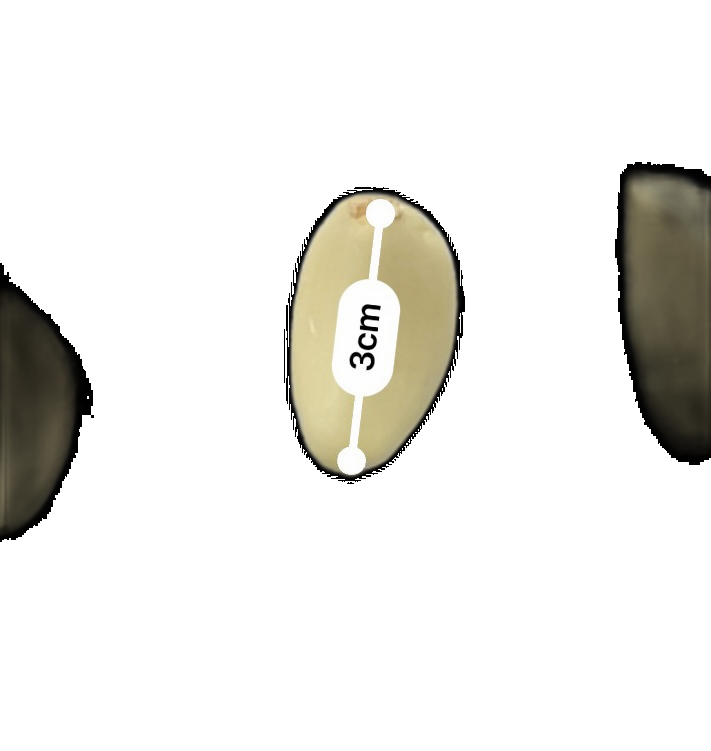

In [20]:
for row in out:
  for col in row:
    if col[3] == 0:
      col[0]=255
      col[1]=255
      col[2]=255
print(out)

rgb_image = out[:,:,:3]
cv2_imshow(rgb_image)


이미지 aplah 0 -> rgb[255, 255, 255]

In [17]:
alpha_mask = (rgba_image[:, :, 3] == 0)
rgb_image[alpha_mask] = [255, 255, 255]

NameError: ignored

In [ ]:
img = np.zeros((300, 300, 3), dtype=np.uint8)
cv2.rectangle(img, (50, 50), (250, 250), color=(255, 0, 0), thickness=-1)
cv2_imshow(img)
img.shape

In [ ]:
# image - rgba
gray1 = cv2.cvtColor(out, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

#image rotation
(h,w) = gray.shape[:2]
center = (w//2, h//2)

M = cv2.getRotationMatrix2D(center, -90, 1.0)
rotated = cv2.warpAffine(gray, M, (w,h))
cv2_imshow(rotated)

# text
options = "--psm 4"
text = pytesseract.image_to_string(rotated, config=options)

print(text)

In [ ]:
# image - rgb
gray2 = cv2.cvtColor(rgb_image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray2, cmap='gray')

#image rotation
(h,w) = gray2.shape[:2]
center = (w//2, h//2)

M = cv2.getRotationMatrix2D(center, -90, 1.0)
rotated2 = cv2.warpAffine(gray2, M, (w,h))
cv2_imshow(rotated2)

# text
options2 = "--psm 4"
text2 = pytesseract.image_to_string(rotated2, config=options2)

print(text2)